,Order_ID,Date,Time,Item,Quantity,Price_per_Item,Table_Number,Payment_Method
0,ORD1000,2023-10-07,13:28:00,Coffee,1,2.92,19,Debit Card
1,ORD1000,2023-10-07,13:28:00,Steak,1,25.20,19,Debit Card
2,ORD1000,2023-10-07,13:28:00,Soda,2,2.80,19,Debit Card
3,ORD1001,2023-10-21,11:23:00,Fries,2,3.01,12,Credit Card
4,ORD1001,2023-10-21,11:23:00,Pizza,1,14.58,12,Credit Card


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        3007 non-null   object        
 1   Date            3007 non-null   datetime64[ns]
 2   Time            3007 non-null   object        
 3   Item            3007 non-null   object        
 4   Quantity        3007 non-null   int64         
 5   Price_per_Item  3007 non-null   float64       
 6   Table_Number    3007 non-null   int64         
 7   Payment_Method  3007 non-null   object        
 8   Total_Price     3007 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 211.6+ KB


None


First 5 rows with Total_Price:


,Order_ID,Date,Time,Item,Quantity,Price_per_Item,Table_Number,Payment_Method,Total_Price
0,ORD1000,2023-10-07,13:28:00,Coffee,1,2.92,19,Debit Card,2.92
1,ORD1000,2023-10-07,13:28:00,Steak,1,25.20,19,Debit Card,25.20
2,ORD1000,2023-10-07,13:28:00,Soda,2,2.80,19,Debit Card,5.60
3,ORD1001,2023-10-21,11:23:00,Fries,2,3.01,12,Credit Card,6.02
4,ORD1001,2023-10-21,11:23:00,Pizza,1,14.58,12,Credit Card,14.58


Total Sales: $46,127.73
Number of Unique Orders: 1000
Average Order Value: $46.13



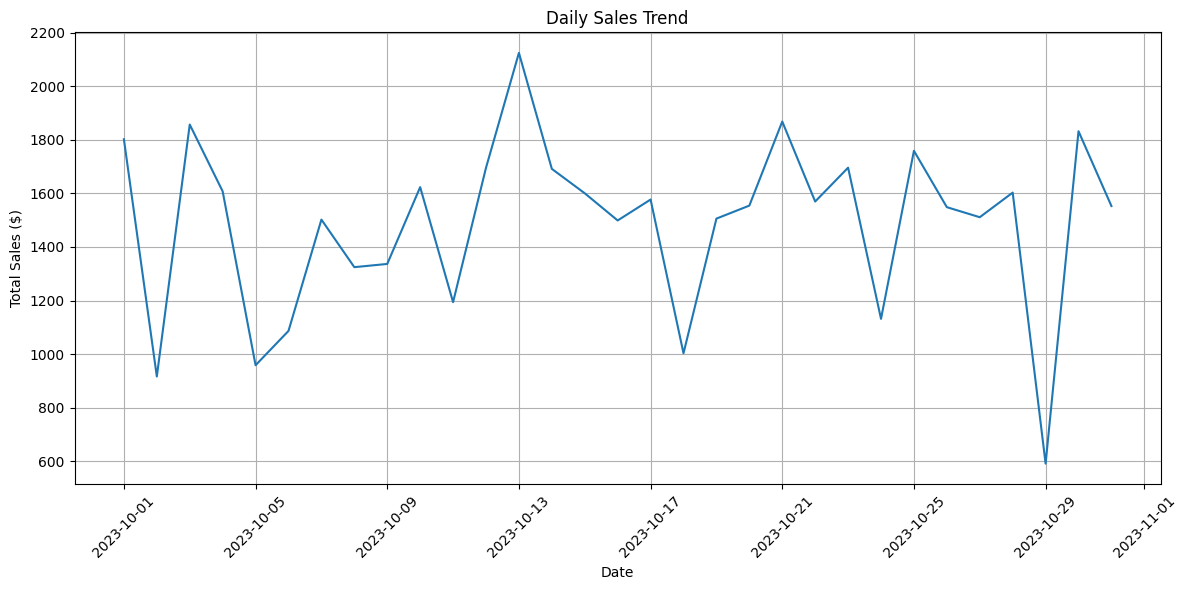

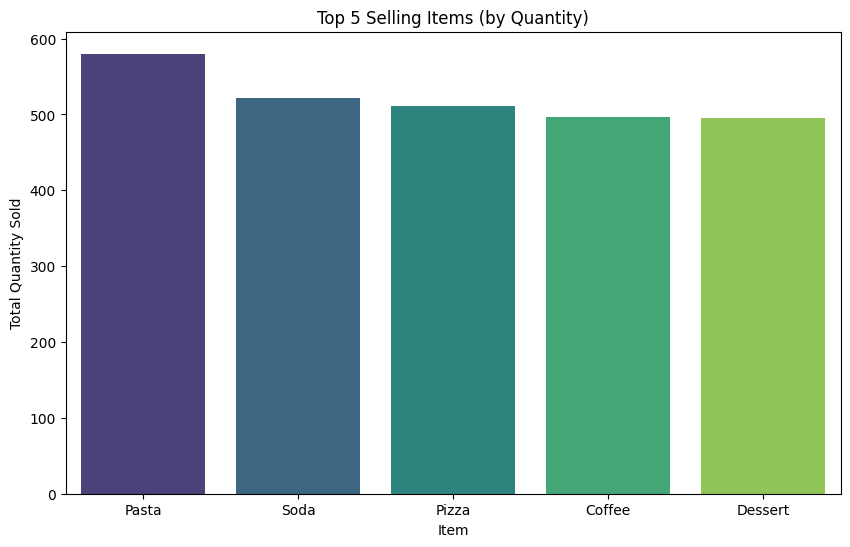

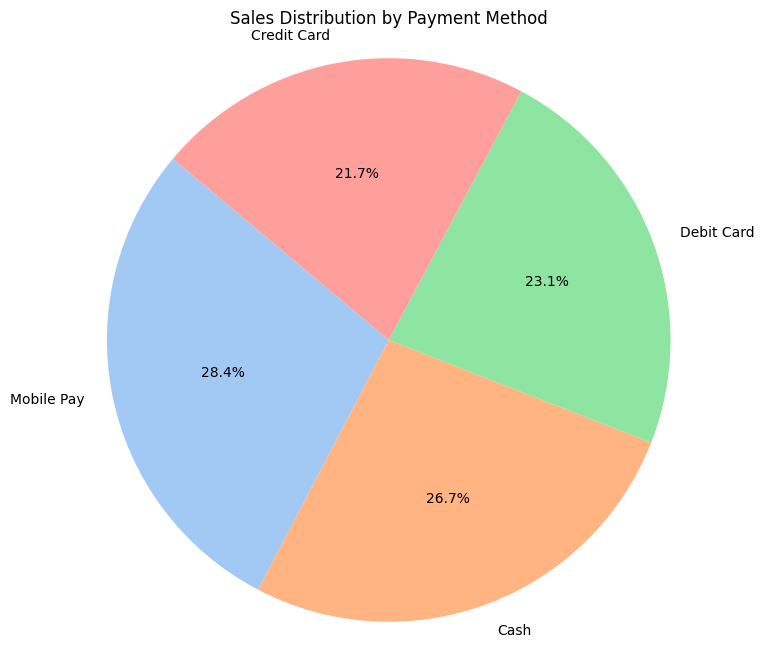

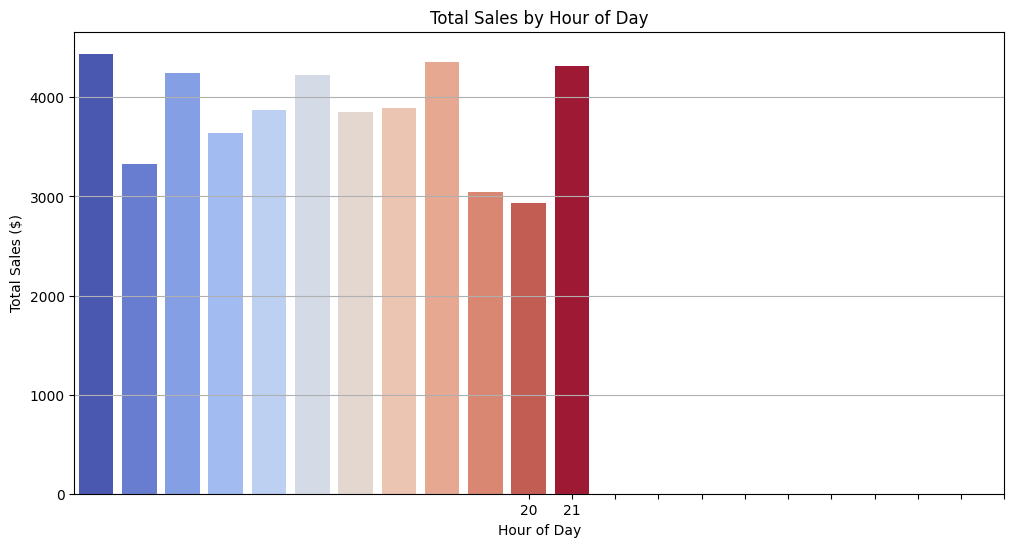

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set a random seed for reproducibility
np.random.seed(42)

# Generate dates for a month
start_date = datetime(2023, 10, 1)
end_date = datetime(2023, 10, 31)
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Sample restaurant items and their base prices
menu_items = {
    'Burger': 12.50,
    'Pizza': 15.00,
    'Pasta': 13.75,
    'Salad': 9.00,
    'Steak': 25.00,
    'Fries': 4.00,
    'Soda': 2.50,
    'Coffee': 3.00,
    'Dessert': 7.00
}

payment_methods = ['Cash', 'Credit Card', 'Debit Card', 'Mobile Pay']

# Number of orders to generate
num_orders = 1000

data = []
for i in range(num_orders):
    order_id = f'ORD{1000 + i}'

    # Random date and time within the month
    date = np.random.choice(date_range)
    time = (datetime.min + timedelta(hours=np.random.randint(10, 22), minutes=np.random.randint(0, 59))).time()

    # Random number of items per order (1 to 5)
    num_items_in_order = np.random.randint(1, 6)

    # Select random items for the order
    ordered_items = np.random.choice(list(menu_items.keys()), num_items_in_order, replace=True)

    table_number = np.random.randint(1, 21) # 20 tables
    payment_method = np.random.choice(payment_methods)

    for item_name in ordered_items:
        quantity = np.random.randint(1, 3) # 1 or 2 of each item
        price_per_item = menu_items[item_name] + np.random.uniform(-1.0, 1.0) # Add some small variation
        price_per_item = round(price_per_item, 2)

        data.append([
            order_id,
            date.strftime('%Y-%m-%d'),
            time.strftime('%H:%M:%S'),
            item_name,
            quantity,
            price_per_item,
            table_number,
            payment_method
        ])

df = pd.DataFrame(data, columns=[
    'Order_ID', 'Date', 'Time', 'Item', 'Quantity', 'Price_per_Item', 'Table_Number', 'Payment_Method'
])

display(df.head())

df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time # Convert to time object only, explicitly specifying format
df['Total_Price'] = df['Quantity'] * df['Price_per_Item']

print("Data Info:")
display(df.info())
print("\nFirst 5 rows with Total_Price:")
display(df.head())
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Total Sales and Average Order Value
total_sales = df['Total_Price'].sum()
num_unique_orders = df['Order_ID'].nunique()
average_order_value = total_sales / num_unique_orders

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Number of Unique Orders: {num_unique_orders}")
print(f"Average Order Value: ${average_order_value:,.2f}\n")

# 2. Daily Sales Trend
daily_sales = df.groupby('Date')['Total_Price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total_Price', data=daily_sales)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Top Selling Items
top_items = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette='viridis', hue=top_items.index, legend=False)
plt.title('Top 5 Selling Items (by Quantity)')
plt.xlabel('Item')
plt.ylabel('Total Quantity Sold')
plt.show()

# 4. Sales by Payment Method
sales_by_payment = df.groupby('Payment_Method')['Total_Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(sales_by_payment, labels=sales_by_payment.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Payment Method')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 5. Busy Hours (Sales by Hour of Day)
# Ensure 'Time' is parsed correctly before extracting hour
df['Hour'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S').dt.hour
hourly_sales = df.groupby('Hour')['Total_Price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Total_Price', data=hourly_sales, palette='coolwarm', hue='Hour', legend=False)
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.grid(axis='y')
plt.xticks(range(10, 22)) # Assuming restaurant operates from 10 AM to 10 PM
plt.show()

